In [82]:
import pandas as pd
from matplotlib import pyplot as plt

titanic_data = pd.read_csv("Titanic_data.csv")
titanic_names = pd.read_csv("Titanic_names.csv")


In [83]:
def explain_data(data):
    print(f"Data Info\n{'-' * 25}")
    print(data.info())
    print(f"\n\n{'-' * 25}\nData Describe\n{'-' * 25}")
    print(data.describe())


explain_data(titanic_data)

Data Info
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1313 non-null   int64  
 1   PClass      1313 non-null   object 
 2   Age         1313 non-null   float64
 3   Gender      1313 non-null   object 
 4   Survived    1313 non-null   int64  
 5   GenderCode  1313 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 61.7+ KB
None


-------------------------
Data Describe
-------------------------
                id          Age     Survived   GenderCode
count  1313.000000  1313.000000  1313.000000  1313.000000
mean    657.000000    17.502574     0.342727     0.351866
std     379.174762    18.516945     0.474802     0.477734
min       1.000000     0.000000     0.000000     0.000000
25%     329.000000     0.000000     0.000000     0.000000
50%     657.000000    18.000000     0.000000  

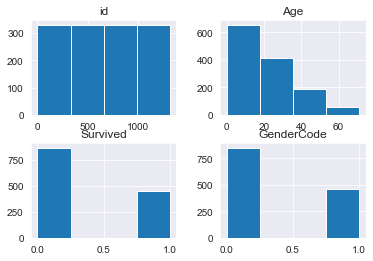

In [84]:
def histogram(data, bins):
    data.hist(bins=bins)
    plt.show()


histogram(titanic_data, 4)

In [85]:
def merge_df(data1, data2):
    return pd.merge(data1, data2, on="id", how="inner")

In [161]:
count_data = merge_df(titanic_data, titanic_names)


def process_zero_age(data):
    zero_age = []
    for i, row in data.iterrows():
        if row["Age"] == 0:
            data.drop(i, inplace=True)
            zero_age.append(i)
    return {"data": data, "zero_age": len(zero_age)}


def count_from_data(data):
    total_passengers = data["Name"].count()
    male = (data["Gender"] == "male").sum()
    female = (data["Gender"] == "female").sum()
    # mean_age = (data["Age"]).mean()

    # Koska datassa on 0 arvoja, tulee nama tiputtaa pois mediaani ikaa laskiessa
    processed_data = process_zero_age(data)
    complete_age_data = processed_data["data"]
    zero_age = processed_data["zero_age"]
    mean_age = round(complete_age_data["Age"].mean(), 1)

    data_dict = {
        "total_passengers": total_passengers,
        "male": male,
        "female": female,
        "known_mean_age": mean_age,
        "count_age_not_known": zero_age
    }

    return data_dict


count_from_data(count_data)

{'total_passengers': 1313,
 'male': 851,
 'female': 462,
 'known_mean_age': 30.4,
 'count_age_not_known': 557}

In [91]:
merged_df = merge_df(titanic_data, titanic_names)
# Get unique values from column
unique_values = merged_df["PClass"].unique()
unique_values

array(['1st', '2nd', '*', '3rd'], dtype=object)

In [160]:
for index, value in merged_df.iterrows():
    if value["PClass"] == 0:
        print(value)

id                            457
PClass                          0
Age                           0.0
Gender                       male
Survived                        0
GenderCode                      0
Name          Jacobsohn Mr Samuel
Name: 456, dtype: object


In [159]:
def how_many_survived(data, gender: str):
    did_survive = {
        "survived": 0,
        "not_survived": 0
    }
    for i, row in data.iterrows():
        if row["Gender"] == gender:
            if row["Survived"] == 1:
                did_survive["survived"] += 1
            else:
                did_survive["not_survived"] += 1

    return did_survive


def get_survived(data):
    total = data["Survived"].count()
    survived = data["Survived"].sum()
    survived_percentage = round((survived / total) * 100, 1)
    not_survived = data["Survived"].count() - survived

    females = how_many_survived(data, "female")
    females_survived = females["survived"]
    females_not_survived = females["not_survived"]

    males = how_many_survived(data, "male")
    males_survived = males["survived"]
    males_not_survived = males["not_survived"]

    data_dict = {
        "survived": survived,
        "survived_%": survived_percentage,
        "not_survived": not_survived,
        "not_survived_%": 100 - survived_percentage,
        "females_survived": females_survived,
        "females_not_survived": females_not_survived,
        "males_survived": males_survived,
        "males_not_survived": males_not_survived
    }
    return pd.DataFrame.from_dict(data_dict, orient="index", columns=["value"])


get_survived(merged_df)

,value
survived,450.0
survived_%,34.3
not_survived,863.0
not_survived_%,65.7
females_survived,308.0
females_not_survived,154.0
males_survived,142.0
males_not_survived,709.0


{'survived': 450, 'not_survived': 863}